In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

In [2]:
data_dir = "../data"
os.listdir(data_dir)

['origin_destination_bus_201912.csv',
 'bus_stops_wszone.dbf',
 'bus_stops_wszone.shp',
 'transport_node_bus_201912.csv.xz',
 'OD_bus',
 'origin_destination_train_201912.csv.xz',
 'train_station_wszone.prj',
 'origin_destination_train_201912-b.csv',
 'origin_destination_train_202001.csv.xz',
 'train_station_wszone.dbf',
 'data_share.7zip',
 'subzone_centroid.csv',
 'origin_destination_bus_201911.csv.xz',
 'busstop_from_api.csv',
 'train_station_wszone.cpg',
 'OD_PT',
 'train_station_wszone.shx',
 'bus_stops.dbf',
 'bus_stops.prj',
 'BusStop',
 'data_share',
 'origin_destination_train_201911.csv.xz',
 'OD_201912_weekend.csv',
 'planning-area-2014',
 'subzone_centroid_pos.json',
 '.ipynb_checkpoints',
 'origin_destination_bus_202001.csv.xz',
 'origin_destination_bus_201912.csv.xz',
 'bus_stops.csv',
 'region-2014',
 'train_station_wszone.shp',
 'origin_destination_train_201912.csv',
 'transport_node_bus_201911.csv.xz',
 'transport_node_train_202001.csv.xz',
 'OD_train',
 'bus_stops_wszon

In [3]:
print(os.listdir(os.path.join(data_dir, "BusStop")))
gdf = gpd.read_file(os.path.join(data_dir, "BusStop", "BusStop.shp"))
gdf.head()

['BusStop.shp.xml', 'BusStop.cpg', 'BusStop.dbf', 'BusStop.shx', 'BusStop.lyr', 'BusStop.sbn', 'BusStop.shp', 'BusStop.prj', 'BusStop.sbx']


,BUS_STOP_N,BUS_ROOF_N,LOC_DESC,geometry
0,78221,B06,None,POINT (42227.955 39563.156)
1,63359,B01,HOUGANG SWIM CPLX,POINT (34065.748 39047.458)
2,64141,B13,AFT JLN TELAWI,POINT (36335.296 38525.741)
3,83139,B07,AFT JOO CHIAT PL,POINT (36530.265 32981.180)
4,31159,B33,None,POINT (12736.242 39473.107)


In [4]:
len(gdf), gdf.crs

(4882,
 {'proj': 'tmerc',
  'lat_0': 1.366666666666667,
  'lon_0': 103.8333333333333,
  'k': 1,
  'x_0': 28001.642,
  'y_0': 38744.572,
  'datum': 'WGS84',
  'units': 'm',
  'no_defs': True})

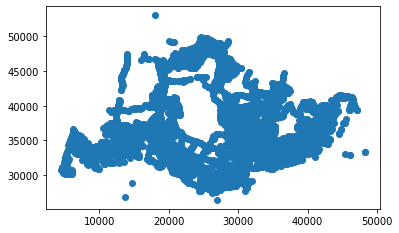

In [5]:
gdf.plot()

In [6]:
target_crs = gdf.crs

In [7]:
gdf2 = gdf.to_crs("epsg:4326")
gdf2.crs

'epsg:4326'

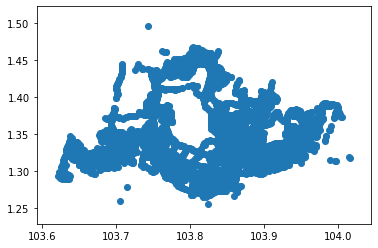

In [8]:
gdf2.plot()

In [9]:
stops = {}
for i, g in zip(gdf2["BUS_STOP_N"].tolist(), gdf2["geometry"].tolist()):
    stops[i] = g

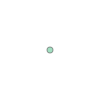

In [10]:
stops['01012']

In [12]:

fs = [ f for f in os.listdir(data_dir) if ".csv.xz" in f ]
fs = [ f for f in fs if "origin_destination_bus" in f ] 
fs

['origin_destination_bus_201911.csv.xz',
 'origin_destination_bus_202001.csv.xz',
 'origin_destination_bus_201912.csv.xz']

In [13]:
all_bus = set()

for f in fs:
    df = pd.read_csv(os.path.join(data_dir, f))
    oo = set(df["ORIGIN_PT_CODE"].tolist())
    dd = set(df["DESTINATION_PT_CODE"].tolist())
    bstops = oo | dd
    all_bus = all_bus | bstops
len(all_bus)

5040

In [11]:
df = pd.read_csv(os.path.join(data_dir, "origin_destination_bus_201912.csv"))
df.head(10)

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
0,2019-12,WEEKENDS/HOLIDAY,12,BUS,93201,92111,38
1,2019-12,WEEKDAY,13,BUS,1239,3059,238
2,2019-12,WEEKDAY,13,BUS,55139,53241,95
3,2019-12,WEEKENDS/HOLIDAY,13,BUS,55139,53241,76
4,2019-12,WEEKENDS/HOLIDAY,13,BUS,40181,53379,38
5,2019-12,WEEKDAY,13,BUS,40181,53379,171
6,2019-12,WEEKDAY,16,BUS,21559,21231,19
7,2019-12,WEEKDAY,21,BUS,65069,64461,399
8,2019-12,WEEKENDS/HOLIDAY,21,BUS,65069,64461,57
9,2019-12,WEEKDAY,10,BUS,51051,66331,19


In [14]:
missing = []
for i in list(all_bus):#list(set(df["ORIGIN_PT_CODE"].tolist())):
    #print(type(i))
    if not(str(i).zfill(5) in stops):
        missing.append(str(i))
    #break
len(missing)

309

In [38]:
missing

['65539',
 '65541',
 '65549',
 '65551',
 '65559',
 '65561',
 '65569',
 '65571',
 '65579',
 '41031',
 '65611',
 '65619',
 '65621',
 '65629',
 '65631',
 '65639',
 '24701',
 '24709',
 '24711',
 '24719',
 '41161',
 '41169',
 '58261',
 '58269',
 '25539',
 '25541',
 '25551',
 '25561',
 '25569',
 '25571',
 '25579',
 '66559',
 '25599',
 '25601',
 '66561',
 '66569',
 '25609',
 '66571',
 '25611',
 '66579',
 '66581',
 '25621',
 '66589',
 '25631',
 '25641',
 '25651',
 '25661',
 '25669',
 '25671',
 '25681',
 '25691',
 '25689',
 '25701',
 '25709',
 '25711',
 '42099',
 '25719',
 '25729',
 '25741',
 '25751',
 '25761',
 '25771',
 '58541',
 '58549',
 '25781',
 '25791',
 '25801',
 '25811',
 '25819',
 '25821',
 '75019',
 '75021',
 '75171',
 '26019',
 '75179',
 '26029',
 '26039',
 '26041',
 '26051',
 '26061',
 '26071',
 '26081',
 '26091',
 '26101',
 '58991',
 '75381',
 '75391',
 '75401',
 '75409',
 '75411',
 '75419',
 '75461',
 '75469',
 '75471',
 '75479',
 '75481',
 '75489',
 '75491',
 '75499',
 '67311',


In [39]:
len(list(set(df["ORIGIN_PT_CODE"].tolist())))

5009

In [15]:
busstops = pd.read_csv(os.path.join(data_dir, "busstop_from_api.csv"), index_col=0)
len(busstops)

5038

In [16]:
busstops.head()

,BusStopCode,Description,Latitude,Longitude,RoadName
0,1012,Hotel Grand Pacific,1.296848,103.852536,Victoria St
1,1013,St. Joseph's Ch,1.297710,103.853225,Victoria St
2,1019,Bras Basah Cplx,1.296990,103.853022,Victoria St
3,1029,Opp Natl Lib,1.296673,103.854414,Nth Bridge Rd
4,1039,Bugis Cube,1.298208,103.855491,Nth Bridge Rd


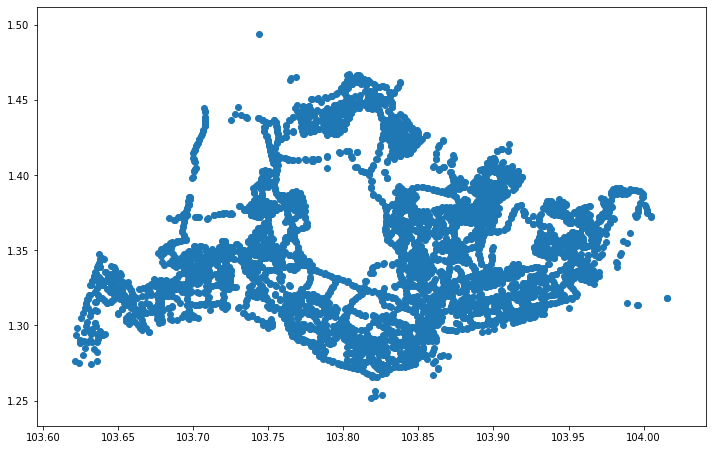

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(busstops["Longitude"], busstops["Latitude"])
ax.set_aspect("equal")
plt.tight_layout()

In [18]:
busstops_id = set(busstops["BusStopCode"].tolist())
pt_codes = set(df["ORIGIN_PT_CODE"].tolist())
pt_codes2 = set(df["DESTINATION_PT_CODE"].tolist())
print(busstops_id.difference(pt_codes))

{64259, 48009, 31121, 45331, 31129, 31131, 45341, 31009, 31139, 31141, 45479, 22571, 31149, 65219, 45381, 84299, 59599, 45391, 22609, 59609, 59361, 45409, 78179, 47201, 31201, 45419, 31211, 45429, 45431, 59771, 67581}


In [21]:
all_bus.difference(busstops_id)

{3219, 55271, 55279}

In [19]:
print(pt_codes.difference(busstops_id))

{55279, 55271}


In [20]:
print(pt_codes2.difference(busstops_id))

{55279, 55271}


In [24]:
for i in all_bus.difference(busstops_id):
    print(i)
    #print(str(i) in stops)
    #print(stops[str(i)])
    print(gdf[gdf["BUS_STOP_N"]==str(i)])

3219
Empty GeoDataFrame
Columns: [BUS_STOP_N, BUS_ROOF_N, LOC_DESC, geometry]
Index: []
55279
    BUS_STOP_N BUS_ROOF_N        LOC_DESC                     geometry
948      55279        B08  LENTOR FLYOVER  POINT (28107.038 41788.958)
55271
     BUS_STOP_N BUS_ROOF_N            LOC_DESC                     geometry
4597      55271        B07  AFT LENTOR FLYOVER  POINT (27911.607 41875.780)


In [67]:
all_busstops = pt_codes|pt_codes2
len(all_busstops)

5029

In [25]:
target_busstops = []
key0 = ["PTcode", "desc", "lat", "lon"]
key1 = ["BusStopCode", "Description", "Latitude", "Longitude"]
key2 = ["BUS_STOP_N", "LOC_DESC", "geometry", "geometry"]
second_source = gdf2['BUS_STOP_N'].tolist()
for i in all_bus:
    if i in busstops_id:
        this_stop = busstops[busstops['BusStopCode']==i]
        this_stop = this_stop.iloc[0]
        this_stop2 = { k0: this_stop[k1] for k0,k1 in zip(key0, key1) }
        #print(this_stop2)
        #break
    elif str(i) in second_source:
        this_stop = gdf2[gdf2['BUS_STOP_N']==str(i)]
        this_stop = this_stop.iloc[0]
        this_geom = this_stop["geometry"]
        this_id = this_stop["BUS_STOP_N"]
        this_desc = this_stop["LOC_DESC"]
        this_lon = this_geom.x
        this_lat = this_geom.y
        this_stop2 = { k0: v for k0,v in zip(key0, [this_id, this_desc, this_lat, this_lon]) }
        #break
    else:
        print("missing {}".format(i))
    target_busstops.append(this_stop2)
len(target_busstops)

missing 3219


5040

In [26]:
df_bus_prep = pd.DataFrame.from_dict(target_busstops)
df_bus_prep.head()

,PTcode,desc,lat,lon
0,65539,Blk 224A,1.402291,103.893700
1,98309,Carissa Pk,1.359960,103.964737
2,65541,Before Sumang Lane,1.403562,103.891200
3,49159,Econ Group,1.437072,103.745813
4,98311,Bef Mariam Wk,1.359306,103.968491


In [27]:
df_bus_prep.to_csv(os.path.join(data_dir, "bus_stops.csv"), index_label="ind")

In [28]:
pts = []
for i in range(len(df_bus_prep)):
    this_row = df_bus_prep.iloc[i]
    this_lon = this_row["lon"]
    this_lat = this_row["lat"]
    pt = Point(this_lon, this_lat)
    pts.append(pt)
gdf_bus_prep = gpd.GeoDataFrame(df_bus_prep, geometry=pts, crs="epsg:4326")

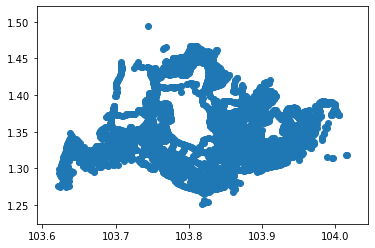

In [29]:
gdf_bus_prep.plot()

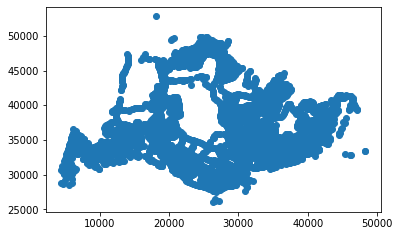

In [30]:
gdf_bus_prep2 = gdf_bus_prep.to_crs(target_crs)
gdf_bus_prep2.plot()

In [31]:
gdf_bus_prep2['PTcode'] = gdf_bus_prep2['PTcode'].apply(str)

In [32]:
gdf_bus_prep2.head()

,PTcode,desc,lat,lon,geometry
0,65539,Blk 224A,1.402291,103.893700,POINT (34719.631 42683.817)
1,98309,Carissa Pk,1.359960,103.964737,POINT (42625.345 38003.381)
2,65541,Before Sumang Lane,1.403562,103.891200,POINT (34441.411 42824.350)
3,49159,Econ Group,1.437072,103.745813,POINT (18261.920 46529.810)
4,98311,Bef Mariam Wk,1.359306,103.968491,POINT (43043.145 37931.100)


In [33]:
gdf_bus_prep2.to_file(os.path.join(data_dir, "bus_stops.shp"))

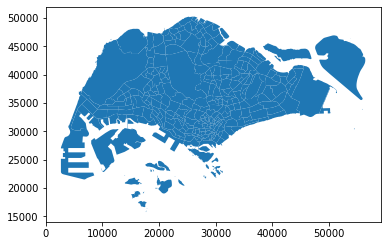

In [34]:
gdf_subzone = gpd.read_file(os.path.join(data_dir, "subzone-2014", "MP14_SUBZONE_WEB_PL.shp"))
gdf_subzone.plot()

In [35]:
gdf_bus_prep3 = gpd.sjoin(gdf_bus_prep2, gdf_subzone, how="left", lsuffix='pt', rsuffix='szone')
gdf_bus_prep3.head()

/home/benny/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'proj': 'tmerc', 'lat_0': 1.366666666666667, 'lon_0': 103.8333333333333, 'k': 1, 'x_0': 28001.642, 'y_0': 38744.572, 'datum': 'WGS84', 'units': 'm', 'no_defs': True, 'wktext': True} != {'proj': 'tmerc', 'lat_0': 1.366666666666667, 'lon_0': 103.8333333333333, 'k': 1, 'x_0': 28001.642, 'y_0': 38744.572, 'datum': 'WGS84', 'units': 'm', 'no_defs': True})
  "(%s != %s)" % (left_df.crs, right_df.crs)


,PTcode,desc,lat,lon,geometry,index_szone,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,...,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area
0,65539,Blk 224A,1.402291,103.893700,POINT (34719.631 42683.817),265.0,266.0,3.0,MATILDA,PGSZ03,...,PUNGGOL,PG,NORTH-EAST REGION,NER,14D0DB33976B7B81,2014-12-05,35089.9853,42728.2745,5361.915964,1.418284e+06
1,98309,Carissa Pk,1.359960,103.964737,POINT (42625.345 38003.381),231.0,232.0,8.0,FLORA DRIVE,PRSZ08,...,PASIR RIS,PR,EAST REGION,ER,FA9C76B49B6D0C95,2014-12-05,42801.7349,37930.5489,3956.615777,9.449984e+05
2,65541,Before Sumang Lane,1.403562,103.891200,POINT (34441.411 42824.350),265.0,266.0,3.0,MATILDA,PGSZ03,...,PUNGGOL,PG,NORTH-EAST REGION,NER,14D0DB33976B7B81,2014-12-05,35089.9853,42728.2745,5361.915964,1.418284e+06
3,49159,Econ Group,1.437072,103.745813,POINT (18261.920 46529.810),288.0,289.0,5.0,RESERVOIR VIEW,SKSZ05,...,SUNGEI KADUT,SK,NORTH REGION,NR,40050ADDFBCC870F,2014-12-05,18367.1710,45940.4868,10399.424485,3.284130e+06
4,98311,Bef Mariam Wk,1.359306,103.968491,POINT (43043.145 37931.100),231.0,232.0,8.0,FLORA DRIVE,PRSZ08,...,PASIR RIS,PR,EAST REGION,ER,FA9C76B49B6D0C95,2014-12-05,42801.7349,37930.5489,3956.615777,9.449984e+05


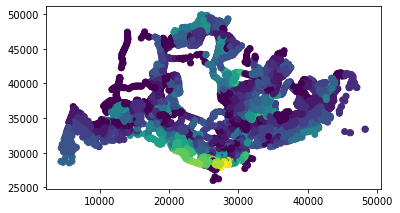

In [36]:
gdf_bus_prep3.plot(column='SUBZONE_NO')

In [37]:
gdf_bus_prep3.to_file(os.path.join(data_dir, "bus_stops_wszone.shp"))

In [38]:
gdf_bus_prep3[pd.isnull(gdf_bus_prep3["SUBZONE_N"])]

,PTcode,desc,lat,lon,geometry,index_szone,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,...,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area
4046,46211,Johor Bahru Checkpt,1.464917,103.765477,POINT (20450.374 49608.748),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4047,46219,Johor Bahru Checkpt,1.465427,103.768267,POINT (20760.795 49665.076),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4050,46239,Larkin Ter,1.493904,103.744033,POINT (18064.118 52814.015),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4590,47711,JB Sentral Bus Ter,1.463458,103.764423,POINT (20333.108 49447.425),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
sorted(list(set(df["TIME_PER_HOUR"].tolist())))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [17]:
df_wday = df[df["DAY_TYPE"]=="WEEKDAY"]
len(df_wday)

3782803

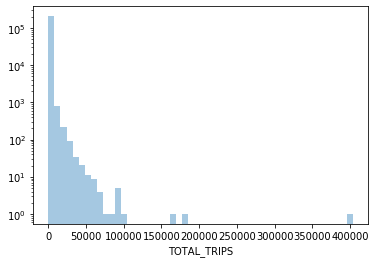

In [18]:
vals = df_wday[df_wday["TIME_PER_HOUR"]==9]
sns.distplot(vals["TOTAL_TRIPS"], kde=False)
ax = plt.gca()
ax.set_yscale("log")